In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
debt = pd.read_csv('LD_debt_consolidation.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (20,50,60,119,130,131,132,135,136,137,140,146,147,148) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
debt.head(10)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,year,issue_y
0,0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2015,2015
1,3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2015,2015
2,5,68426831,NaN,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2015,2015
3,6,68476668,NaN,20000.0,20000.0,20000.0,36 months,9.17,637.58,B,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2015,2015
4,10,68356421,NaN,22400.0,22400.0,22400.0,60 months,12.88,508.30,C,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2015,2015
5,11,68426545,NaN,16000.0,16000.0,16000.0,60 months,12.88,363.07,C,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2015,2015
6,13,66624733,NaN,18000.0,18000.0,18000.0,60 months,19.48,471.70,E,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2015,2015
7,14,68466961,NaN,28000.0,28000.0,28000.0,36 months,6.49,858.05,A,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2015,2015
8,16,68466916,NaN,25000.0,25000.0,25000.0,36 months,7.49,777.55,A,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2015,2015
9,17,68577849,NaN,18000.0,18000.0,18000.0,60 months,11.99,400.31,C,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2015,2015


<h3>Remove variables that are not available to investors before the approval decision</h3>

In [4]:
# name of variables that are available to investors by the approval decision

In [5]:
var_desc_before = pd.read_excel('LCDataDictionary.xlsx', sheet_name=2)
var_desc_before

,infor_before_aprroval
0,NaN
1,acc_now_delinq
2,acc_open_past_24mths
3,addr_state
4,all_util
...,...
116,sec_app_chargeoff_within_12_mths
117,sec_app_collections_12_mths_ex_med
118,sec_app_mths_since_last_major_derog
119,disbursement_method


In [6]:
var_all_before  = list(var_desc_before['infor_before_aprroval'].dropna())
var_all_before

['acc_now_delinq',
 'acc_open_past_24mths',
 'addr_state',
 'all_util',
 'annual_inc_joint',
 'annual_inc',
 'application_type',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'collections_12_mths_ex_med',
 'delinq_2yrs',
 'delinq_amnt',
 'desc',
 'dti',
 'dti_joint',
 'emp_title',
 'emp_length',
 'fico_range_high',
 'fico_range_low',
 'funded_amnt',
 'grade',
 'home_ownership',
 'id',
 'il_util',
 'initial_list_status',
 'inq_fi',
 'inq_last_12m',
 'inq_last_6mths',
 'installment',
 'int_rate',
 'verification_status',
 'loan_amnt',
 'max_bal_bc',
 'member_id',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_last_major_derog',
 'mo_sin_old_il_acct',
 'mths_since_rcnt_il',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'mths_since_recent_inq',
 'mths_since_recent_bc',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_

In [7]:
var_removed = ['member_id', 'url', 'desc', 'id', 'emp_title', 'grade', 'int_rate'] 
var_selected = list(set(var_all_before) - set(var_removed))
var_selected.append('verification_status_joint')
var_selected.remove('verified_status_joint')
data = debt[var_selected]

In [11]:
data.head()

,total_acc,mths_since_last_delinq,fico_range_low,initial_list_status,num_il_tl,inq_last_12m,home_ownership,mths_since_recent_bc,num_bc_sats,open_acc,...,open_act_il,disbursement_method,title,sec_app_inq_last_6mths,num_actv_bc_tl,sec_app_open_acc,mths_since_rcnt_il,sec_app_num_rev_accts,open_il_24m,verification_status_joint
0,13.0,30.0,675.0,w,3.0,4.0,MORTGAGE,4.0,2.0,7.0,...,2.0,Cash,Debt consolidation,NaN,2.0,NaN,21.0,NaN,1.0,NaN
1,17.0,NaN,785.0,w,2.0,0.0,MORTGAGE,2.0,8.0,13.0,...,1.0,Cash,Debt consolidation,NaN,4.0,NaN,23.0,NaN,1.0,NaN
2,6.0,NaN,690.0,w,2.0,0.0,RENT,36.0,2.0,5.0,...,1.0,Cash,Debt consolidation,NaN,2.0,NaN,338.0,NaN,0.0,NaN
3,27.0,49.0,680.0,f,7.0,1.0,MORTGAGE,12.0,4.0,12.0,...,2.0,Cash,Debt consolidation,NaN,4.0,NaN,18.0,NaN,2.0,NaN
4,35.0,54.0,710.0,w,15.0,0.0,MORTGAGE,1.0,4.0,16.0,...,5.0,Cash,Debt consolidation,NaN,3.0,NaN,17.0,NaN,3.0,NaN


(array([66.,  1.,  0., 12.,  2.,  1.,  1.,  1.,  1., 16.]),
 array([0.        , 0.09831778, 0.19663556, 0.29495335, 0.39327113,
        0.49158891, 0.58990669, 0.68822447, 0.78654226, 0.88486004,
        0.98317782]),
 <a list of 10 Patch objects>)

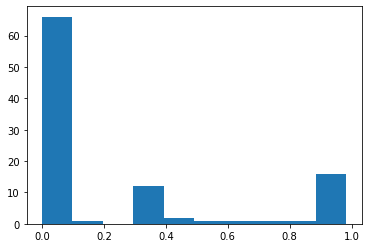

In [12]:
data_missing_ratio = data.isna().mean().sort_values().to_frame('missing')
plt.hist(data_missing_ratio.missing)

In [13]:
data_missing_ratio.index

Index(['total_acc', 'term', 'installment', 'application_type', 'purpose',
       'funded_amnt', 'loan_amnt', 'delinq_2yrs', 'loan_status',
       'acc_now_delinq',
       ...
       'revol_bal_joint', 'sec_app_inq_last_6mths', 'sec_app_mort_acc',
       'sec_app_open_acc', 'sec_app_fico_range_low', 'sec_app_num_rev_accts',
       'sec_app_fico_range_high', 'sec_app_open_act_il', 'sec_app_revol_util',
       'sec_app_mths_since_last_major_derog'],
      dtype='object', length=101)

In [50]:
var_good = data_missing_ratio[data_missing_ratio.missing<0.5].index.to_list()
data_refined = data[var_good]
data_refined

,total_acc,term,installment,application_type,purpose,funded_amnt,loan_amnt,delinq_2yrs,loan_status,acc_now_delinq,annual_inc,fico_range_high,tax_liens,collections_12_mths_ex_med,addr_state,pub_rec_bankruptcies,chargeoff_within_12_mths,open_acc,verification_status,home_ownership,sub_grade,revol_bal,initial_list_status,fico_range_low,disbursement_method,pub_rec,delinq_amnt,inq_last_6mths,zip_code,revol_util,dti,mort_acc,acc_open_past_24mths,total_bc_limit,total_bal_ex_mort,num_sats,num_bc_sats,title,num_bc_tl,num_actv_bc_tl,num_il_tl,num_tl_90g_dpd_24m,tot_cur_bal,mo_sin_rcnt_tl,num_op_rev_tl,num_accts_ever_120_pd,tot_coll_amt,num_rev_tl_bal_gt_0,num_actv_rev_tl,num_tl_30dpd,tot_hi_cred_lim,total_il_high_credit_limit,num_tl_op_past_12m,total_rev_hi_lim,num_rev_accts,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,avg_cur_bal,pct_tl_nvr_dlq,mths_since_recent_bc,bc_open_to_buy,percent_bc_gt_75,bc_util,mo_sin_old_il_acct,num_tl_120dpd_2m,emp_length,mths_since_recent_inq,total_bal_il,max_bal_bc,open_il_24m,open_il_12m,open_act_il,inq_fi,open_rv_12m,open_rv_24m,total_cu_tl,open_acc_6m,inq_last_12m,all_util,mths_since_rcnt_il,il_util
0,13.0,36 months,123.03,Individual,debt_consolidation,3600.0,3600.0,0.0,Fully Paid,0.0,55000.0,679.0,0.0,0.0,PA,0.0,0.0,7.0,Not Verified,MORTGAGE,C4,2765.0,w,675.0,Cash,0.0,0.0,1.0,190xx,29.7,5.91,1.0,4.0,2400.0,7746.0,7.0,2.0,Debt consolidation,5.0,2.0,3.0,0.0,144904.0,3.0,4.0,2.0,722.0,4.0,4.0,0.0,178050.0,13734.0,3.0,9300.0,9.0,3.0,128.0,20701.0,76.9,4.0,1506.0,0.0,37.2,148.0,0.0,10+ years,4.0,4981.0,722.0,1.0,0.0,2.0,3.0,3.0,3.0,1.0,2.0,4.0,34.0,21.0,36.0
1,17.0,60 months,829.90,Individual,debt_consolidation,35000.0,35000.0,0.0,Current,0.0,110000.0,789.0,0.0,0.0,NJ,0.0,0.0,13.0,Source Verified,MORTGAGE,C5,7802.0,w,785.0,Cash,0.0,0.0,0.0,076xx,11.6,17.06,1.0,2.0,62500.0,52226.0,13.0,8.0,Debt consolidation,10.0,4.0,2.0,0.0,301500.0,2.0,10.0,0.0,0.0,5.0,5.0,0.0,381215.0,18000.0,1.0,67300.0,13.0,2.0,87.0,23192.0,100.0,2.0,54962.0,0.0,12.1,36.0,0.0,10+ years,NaN,12609.0,6987.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,45.0,23.0,70.0
2,6.0,36 months,405.18,Individual,debt_consolidation,11950.0,11950.0,0.0,Fully Paid,0.0,34000.0,694.0,0.0,0.0,GA,0.0,0.0,5.0,Source Verified,RENT,C3,8822.0,w,690.0,Cash,0.0,0.0,0.0,300xx,68.4,10.20,0.0,0.0,9400.0,12798.0,5.0,2.0,Debt consolidation,2.0,2.0,2.0,0.0,12798.0,32.0,4.0,0.0,0.0,3.0,3.0,0.0,16900.0,4000.0,0.0,12900.0,4.0,32.0,54.0,2560.0,100.0,36.0,844.0,100.0,91.0,338.0,0.0,4 years,NaN,3976.0,4522.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,76.0,338.0,99.0
3,27.0,36 months,637.58,Individual,debt_consolidation,20000.0,20000.0,0.0,Fully Paid,0.0,180000.0,684.0,0.0,0.0,MN,0.0,0.0,12.0,Not Verified,MORTGAGE,B2,87329.0,f,680.0,Cash,0.0,0.0,0.0,550xx,84.5,14.67,4.0,6.0,31500.0,116762.0,12.0,4.0,Debt consolidation,5.0,4.0,7.0,0.0,360358.0,10.0,9.0,0.0,0.0,6.0,6.0,0.0,388852.0,46452.0,2.0,94200.0,16.0,10.0,306.0,30030.0,96.3,12.0,0.0,100.0,102.9,142.0,0.0,10+ years,10.0,29433.0,13048.0,2.0,0.0,2.0,1.0,2.0,3.0,0.0,0.0,1.0,74.0,18.0,63.0
4,35.0,60 months,508.30,Individual,debt_consolidation,22400.0,22400.0,0.0,Current,0.0,95000.0,714.0,0.0,0.0,SC,0.0,0.0,16.0,Not Verified,MORTGAGE,C2,13028.0,w,710.0,Cash,0.0,0.0,0.0,290xx,32.7,22.98,5.0,9.0,21000.0,184356.0,16.0,4.0,Debt consolidation,5.0,3.0,15.0,0.0,376218.0,1.0,10.0,2.0,0.0,8.0,8.0,0.0,436841.0,191682.0,3.0,39800.0,15.0,1.0,248.0,23514.0,97.0,1.0,12617.0,25.0,39.9,150.0,0.0,6 years,14.0,171328.0,8121.0,3.0,0.0,5.0,1.0,3.0,6.0,5.0,1.0,0.0,54.0,17.0,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1258096,32.0,60 months,683.94,Individual,debt_consolidation,29400.0,29400.0,0.0,Fully Paid,0.0,180792.0,709.0,0.0,0.0,CA,0.0,0.0,16.0,Not Verified,MORTGAGE,C3,77480.0,f,7

In [51]:
data_refined.isna().mean().sort_values().to_frame()

,0
total_acc,0.000000
delinq_amnt,0.000000
pub_rec,0.000000
disbursement_method,0.000000
fico_range_low,0.000000
...,...
open_acc_6m,0.391409
inq_last_12m,0.391409
all_util,0.391473
mths_since_rcnt_il,0.407586


In [52]:
data_refined.columns

Index(['total_acc', 'term', 'installment', 'application_type', 'purpose',
       'funded_amnt', 'loan_amnt', 'delinq_2yrs', 'loan_status',
       'acc_now_delinq', 'annual_inc', 'fico_range_high', 'tax_liens',
       'collections_12_mths_ex_med', 'addr_state', 'pub_rec_bankruptcies',
       'chargeoff_within_12_mths', 'open_acc', 'verification_status',
       'home_ownership', 'sub_grade', 'revol_bal', 'initial_list_status',
       'fico_range_low', 'disbursement_method', 'pub_rec', 'delinq_amnt',
       'inq_last_6mths', 'zip_code', 'revol_util', 'dti', 'mort_acc',
       'acc_open_past_24mths', 'total_bc_limit', 'total_bal_ex_mort',
       'num_sats', 'num_bc_sats', 'title', 'num_bc_tl', 'num_actv_bc_tl',
       'num_il_tl', 'num_tl_90g_dpd_24m', 'tot_cur_bal', 'mo_sin_rcnt_tl',
       'num_op_rev_tl', 'num_accts_ever_120_pd', 'tot_coll_amt',
       'num_rev_tl_bal_gt_0', 'num_actv_rev_tl', 'num_tl_30dpd',
       'tot_hi_cred_lim', 'total_il_high_credit_limit', 'num_tl_op_past_12m',


In [53]:
fill_max = ['mths_since_recent_inq','mths_since_rcnt_il','bc_open_to_buy','pct_tl_nvr_dlq','mths_since_recent_bc','mo_sin_old_il_acct']
len(fill_max)

6

In [54]:
fill_empty = ['title', 'zip_code', 'loan_status']

In [55]:
var_list = data_refined.columns.values
len(var_list)

81

In [56]:
fill_min = np.setdiff1d(data_refined.columns.values, np.append(fill_empty, fill_max))
len(fill_min)

72

In [57]:
data_refined[fill_min] = data_refined[fill_min].fillna(data_refined[fill_min].min())
# for i in fill_min:
#     try:
#         data_refined[i] = data_refined[i].fillna(data_refined[i].min())
#     except:
#         print(i)

In [58]:
data_refined[fill_max] = data_refined[fill_max].fillna(data_refined[fill_max].max())

In [59]:
data_refined[fill_empty] = data_refined[fill_empty].fillna('')

In [60]:
data_refined['emp_length'] = data_refined['emp_length'].fillna('< 1 year')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
pd.set_option('display.max_columns', None)
data_refined

,total_acc,term,installment,application_type,purpose,funded_amnt,loan_amnt,delinq_2yrs,loan_status,acc_now_delinq,annual_inc,fico_range_high,tax_liens,collections_12_mths_ex_med,addr_state,pub_rec_bankruptcies,chargeoff_within_12_mths,open_acc,verification_status,home_ownership,sub_grade,revol_bal,initial_list_status,fico_range_low,disbursement_method,pub_rec,delinq_amnt,inq_last_6mths,zip_code,revol_util,dti,mort_acc,acc_open_past_24mths,total_bc_limit,total_bal_ex_mort,num_sats,num_bc_sats,title,num_bc_tl,num_actv_bc_tl,num_il_tl,num_tl_90g_dpd_24m,tot_cur_bal,mo_sin_rcnt_tl,num_op_rev_tl,num_accts_ever_120_pd,tot_coll_amt,num_rev_tl_bal_gt_0,num_actv_rev_tl,num_tl_30dpd,tot_hi_cred_lim,total_il_high_credit_limit,num_tl_op_past_12m,total_rev_hi_lim,num_rev_accts,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,avg_cur_bal,pct_tl_nvr_dlq,mths_since_recent_bc,bc_open_to_buy,percent_bc_gt_75,bc_util,mo_sin_old_il_acct,num_tl_120dpd_2m,emp_length,mths_since_recent_inq,total_bal_il,max_bal_bc,open_il_24m,open_il_12m,open_act_il,inq_fi,open_rv_12m,open_rv_24m,total_cu_tl,open_acc_6m,inq_last_12m,all_util,mths_since_rcnt_il,il_util
0,13.0,36 months,123.03,Individual,debt_consolidation,3600.0,3600.0,0.0,Fully Paid,0.0,55000.0,679.0,0.0,0.0,PA,0.0,0.0,7.0,Not Verified,MORTGAGE,C4,2765.0,w,675.0,Cash,0.0,0.0,1.0,190xx,29.7,5.91,1.0,4.0,2400.0,7746.0,7.0,2.0,Debt consolidation,5.0,2.0,3.0,0.0,144904.0,3.0,4.0,2.0,722.0,4.0,4.0,0.0,178050.0,13734.0,3.0,9300.0,9.0,3.0,128.0,20701.0,76.9,4.0,1506.0,0.0,37.2,148.0,0.0,10+ years,4.0,4981.0,722.0,1.0,0.0,2.0,3.0,3.0,3.0,1.0,2.0,4.0,34.0,21.0,36.0
1,17.0,60 months,829.90,Individual,debt_consolidation,35000.0,35000.0,0.0,Current,0.0,110000.0,789.0,0.0,0.0,NJ,0.0,0.0,13.0,Source Verified,MORTGAGE,C5,7802.0,w,785.0,Cash,0.0,0.0,0.0,076xx,11.6,17.06,1.0,2.0,62500.0,52226.0,13.0,8.0,Debt consolidation,10.0,4.0,2.0,0.0,301500.0,2.0,10.0,0.0,0.0,5.0,5.0,0.0,381215.0,18000.0,1.0,67300.0,13.0,2.0,87.0,23192.0,100.0,2.0,54962.0,0.0,12.1,36.0,0.0,10+ years,25.0,12609.0,6987.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,45.0,23.0,70.0
2,6.0,36 months,405.18,Individual,debt_consolidation,11950.0,11950.0,0.0,Fully Paid,0.0,34000.0,694.0,0.0,0.0,GA,0.0,0.0,5.0,Source Verified,RENT,C3,8822.0,w,690.0,Cash,0.0,0.0,0.0,300xx,68.4,10.20,0.0,0.0,9400.0,12798.0,5.0,2.0,Debt consolidation,2.0,2.0,2.0,0.0,12798.0,32.0,4.0,0.0,0.0,3.0,3.0,0.0,16900.0,4000.0,0.0,12900.0,4.0,32.0,54.0,2560.0,100.0,36.0,844.0,100.0,91.0,338.0,0.0,4 years,25.0,3976.0,4522.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,76.0,338.0,99.0
3,27.0,36 months,637.58,Individual,debt_consolidation,20000.0,20000.0,0.0,Fully Paid,0.0,180000.0,684.0,0.0,0.0,MN,0.0,0.0,12.0,Not Verified,MORTGAGE,B2,87329.0,f,680.0,Cash,0.0,0.0,0.0,550xx,84.5,14.67,4.0,6.0,31500.0,116762.0,12.0,4.0,Debt consolidation,5.0,4.0,7.0,0.0,360358.0,10.0,9.0,0.0,0.0,6.0,6.0,0.0,388852.0,46452.0,2.0,94200.0,16.0,10.0,306.0,30030.0,96.3,12.0,0.0,100.0,102.9,142.0,0.0,10+ years,10.0,29433.0,13048.0,2.0,0.0,2.0,1.0,2.0,3.0,0.0,0.0,1.0,74.0,18.0,63.0
4,35.0,60 months,508.30,Individual,debt_consolidation,22400.0,22400.0,0.0,Current,0.0,95000.0,714.0,0.0,0.0,SC,0.0,0.0,16.0,Not Verified,MORTGAGE,C2,13028.0,w,710.0,Cash,0.0,0.0,0.0,290xx,32.7,22.98,5.0,9.0,21000.0,184356.0,16.0,4.0,Debt consolidation,5.0,3.0,15.0,0.0,376218.0,1.0,10.0,2.0,0.0,8.0,8.0,0.0,436841.0,191682.0,3.0,39800.0,15.0,1.0,248.0,23514.0,97.0,1.0,12617.0,25.0,39.9,150.0,0.0,6 years,14.0,171328.0,8121.0,3.0,0.0,5.0,1.0,3.0,6.0,5.0,1.0,0.0,54.0,17.0,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1258096,32.0,60 months,683.94,Individual,debt_consolidation,29400.0,29400.0,0.0,Fully Paid,0.0,180792.0,709.0,0.0,0.0,CA,0.0,0.0,16.0,Not Verified,MORTGAGE,C3,77480.0,f

In [62]:
X = data_refined.drop(['purpose', 'title', 'sub_grade','zip_code', 'loan_status'], axis = 1)

In [63]:
Y = data_refined.loan_status.apply(lambda x: 'good' if x in ['Fully Paid', 'Current', 'In Grace Period'] else 'bad' )
X.verification_status = X.verification_status.apply(lambda x: 'Verified' if x == 'Source Verified' else x)

In [67]:
for i in binary:
    print(pd.unique(X[i]))

[' 36 months' ' 60 months']
['Individual' 'Joint App']
['w' 'f']
['Cash' 'DirectPay']
['Not Verified' 'Verified']


In [71]:
binary = ['term', 'application_type', 'initial_list_status', 'disbursement_method', 'verification_status' ]
binary_positives = [' 60 months', 'w', 'Individual', 'Cash', 'Verified']
multiple = ['home_ownership', 'home_ownership']
numeric = ['emp_length']

In [65]:
emp_ordering = [
    '< 1 year',
    '1 year',
    '2 years',
    '3 years',
    '4 years',
    '5 years',
    '6 years',
    '7 years',
    '8 years',
    '9 years',
    '10+ years'
]

def ordinal_encode(df, column, ordering):
    df[column] = df[column].apply(lambda x: ordering.index(x))
    
ordinal_encode(X, 'emp_length', emp_ordering)

In [69]:
def onehot_encode(df, column):
    dummies = pd.get_dummies(df[column])
    df_new = pd.concat([df, dummies], axis=1)
    df_new = df_new.drop(column, axis=1)
    return df_new

X = onehot_encode(X, 'addr_state')
X = onehot_encode(X, 'home_ownership')

In [72]:
def binary_encode(df, column, positive_value):
    df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    
for feature, positive_value in zip(binary, binary_positives):
    binary_encode(X, feature, positive_value)

In [73]:
X

,total_acc,term,installment,application_type,funded_amnt,loan_amnt,delinq_2yrs,acc_now_delinq,annual_inc,fico_range_high,tax_liens,collections_12_mths_ex_med,pub_rec_bankruptcies,chargeoff_within_12_mths,open_acc,verification_status,revol_bal,initial_list_status,fico_range_low,disbursement_method,pub_rec,delinq_amnt,inq_last_6mths,revol_util,dti,mort_acc,acc_open_past_24mths,total_bc_limit,total_bal_ex_mort,num_sats,num_bc_sats,num_bc_tl,num_actv_bc_tl,num_il_tl,num_tl_90g_dpd_24m,tot_cur_bal,mo_sin_rcnt_tl,num_op_rev_tl,num_accts_ever_120_pd,tot_coll_amt,num_rev_tl_bal_gt_0,num_actv_rev_tl,num_tl_30dpd,tot_hi_cred_lim,total_il_high_credit_limit,num_tl_op_past_12m,total_rev_hi_lim,num_rev_accts,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,avg_cur_bal,pct_tl_nvr_dlq,mths_since_recent_bc,bc_open_to_buy,percent_bc_gt_75,bc_util,mo_sin_old_il_acct,num_tl_120dpd_2m,emp_length,mths_since_recent_inq,total_bal_il,max_bal_bc,open_il_24m,open_il_12m,open_act_il,inq_fi,open_rv_12m,open_rv_24m,total_cu_tl,open_acc_6m,inq_last_12m,all_util,mths_since_rcnt_il,il_util,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,ANY,MORTGAGE,NONE,OTHER,OWN,RENT
0,13.0,0,123.03,0,3600.0,3600.0,0.0,0.0,55000.0,679.0,0.0,0.0,0.0,0.0,7.0,0,2765.0,0,675.0,1,0.0,0.0,1.0,29.7,5.91,1.0,4.0,2400.0,7746.0,7.0,2.0,5.0,2.0,3.0,0.0,144904.0,3.0,4.0,2.0,722.0,4.0,4.0,0.0,178050.0,13734.0,3.0,9300.0,9.0,3.0,128.0,20701.0,76.9,4.0,1506.0,0.0,37.2,148.0,0.0,10,4.0,4981.0,722.0,1.0,0.0,2.0,3.0,3.0,3.0,1.0,2.0,4.0,34.0,21.0,36.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,17.0,1,829.90,0,35000.0,35000.0,0.0,0.0,110000.0,789.0,0.0,0.0,0.0,0.0,13.0,1,7802.0,0,785.0,1,0.0,0.0,0.0,11.6,17.06,1.0,2.0,62500.0,52226.0,13.0,8.0,10.0,4.0,2.0,0.0,301500.0,2.0,10.0,0.0,0.0,5.0,5.0,0.0,381215.0,18000.0,1.0,67300.0,13.0,2.0,87.0,23192.0,100.0,2.0,54962.0,0.0,12.1,36.0,0.0,10,25.0,12609.0,6987.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,45.0,23.0,70.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,6.0,0,405.18,0,11950.0,11950.0,0.0,0.0,34000.0,694.0,0.0,0.0,0.0,0.0,5.0,1,8822.0,0,690.0,1,0.0,0.0,0.0,68.4,10.20,0.0,0.0,9400.0,12798.0,5.0,2.0,2.0,2.0,2.0,0.0,12798.0,32.0,4.0,0.0,0.0,3.0,3.0,0.0,16900.0,4000.0,0.0,12900.0,4.0,32.0,54.0,2560.0,100.0,36.0,844.0,100.0,91.0,338.0,0.0,4,25.0,3976.0,4522.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,76.0,338.0,99.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,27.0,0,637.58,0,20000.0,20000.0,0.0,0.0,180000.0,684.0,0.0,0.0,0.0,0.0,12.0,0,87329.0,0,680.0,1,0.0,0.0,0.0,84.5,14.67,4.0,6.0,31500.0,116762.0,12.0,4.0,5.0,4.0,7.0,0.0,360358.0,10.0,9.0,0.0,0.0,6.0,6.0,0.0,388852.0,46452.0,2.0,94200.0,16.0,10.0,306.0,30030.0,96.3,12.0,0.0,100.0,102.9,142.0,0.0,10,10.0,29433.0,13048.0,2.0,0.0,2.0,1.0,2.0,3.0,0.0,0.0,1.0,74.0,18.0,63.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,35.0,1,508.30,0,22400.0,22400.0,0.0,0.0,95000.0,714.0,0.0,0.0,0.0,0.0,16.0,0,13028.0,0,710.0,1,0.0,0.0,0.0,32.7,22.98,5.0,9.0,21000.0,184356.0,16.0,4.0,5.0,3.0,15.0,0.0,376218.0,1.0,10.0,2.0,0.0,8.0,8.0,0.0,436841.0,191682.0,3.0,39800.0,15.0,1.0,248.0,23514.0,97.0,1.0,12617.0,25.0,39.9,150.0,0.0,6,14.0,171328.0,8121.0,3.0,0.0,5.0,1.0,3.0,6.0,5.0,1.0,0.0,54.0,17.0,67.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
lrg = LogisticRegression()
lrg.fit(X_train,y_train)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [75]:
prediction = lrg.predict(X_test)

Classification report for classifier LogisticRegression():
              precision    recall  f1-score   support

         bad       0.28      0.00      0.00     58266
        good       0.86      1.00      0.92    356908

    accuracy                           0.86    415174
   macro avg       0.57      0.50      0.46    415174
weighted avg       0.78      0.86      0.79    415174


Confusion matrix:
[[    22  58244]
 [    56 356852]]


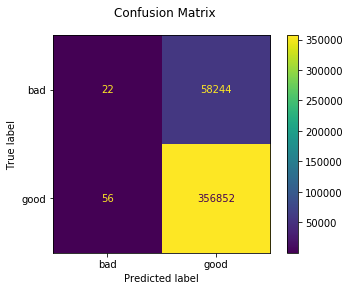

In [79]:
from sklearn import metrics
print("Classification report for classifier %s:\n%s\n"
      % (lrg, metrics.classification_report(y_test, prediction)))
disp = metrics.plot_confusion_matrix(lrg, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)
